5.1 주성분 분석을 통한 비지도 차원 축소

In [14]:
import pandas as pd

df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/'
                      'machine-learning-databases/wine/wine.data',
                      header=None)

In [15]:
df_wine.shape
#  178개행과 14개의 특성값을 갖는 데이터 프레임임
# # df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
#                    'Alcalinity of ash', 'Magnesium', 'Total phenols',
#                    'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
#                    'Color intensity', 'Hue', 'OD280/OD315 of diluted wines',
#                    'Proline']

(178, 14)

In [16]:
from sklearn.model_selection import train_test_split
X,y=df_wine.iloc[:,1:].values,df_wine.iloc[:,0].values
# Trian test X,y에 행은 전체 0번째 칼럼은 빼고 X로 첫번쨰 칼럼만 y에 넣는다 (0번 칼럼은 클래스 라벨(정답)이기 때문에 0번칼럼은 제거함)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,stratify=y,random_state=0)
# 7대 3으로 훈련셋을 나눈다.
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
# 정규화 함수를 sc에 담고
X_train_std=sc.fit_transform(X_train)
X_test_std=sc.transform(X_test)
# 데이터 셋을 정규화함 


In [17]:
import numpy as np
cov_mat=np.cov(X_test_std.T)
# 공분산 행렬을 구해서 cov_mat에 집어넣음
eigen_vals,eigen_vecs=np.linalg.eig(cov_mat)
# 공분산 행렬의 고유값, 고유벡터를 구한다. 
print("\n 고윳값\n%s"% eigen_vals)
# 고유값을 출력한다.


 고윳값
[4.60875701 2.90204017 1.31306798 0.93788381 0.7853038  0.06834849
 0.11104083 0.12866858 0.2066364  0.26340181 0.3525347  0.53181959
 0.5036732 ]


In [18]:
print(eigen_vals.shape)
print(eigen_vecs.shape)

(13,)
(13, 13)


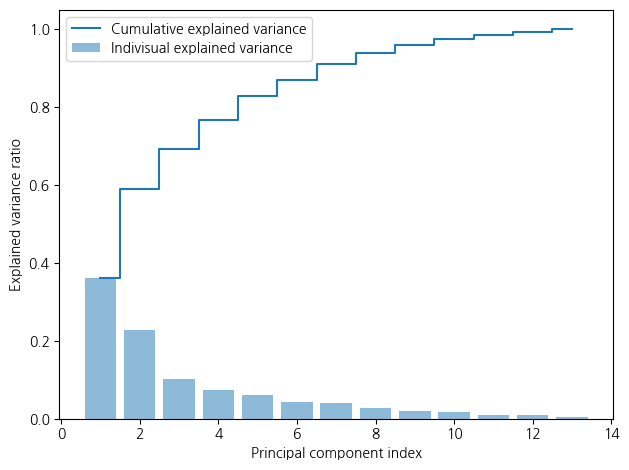

In [19]:
tot=sum(eigen_vals)
# 고유값의 합을 구함
var_exp=[(i/tot) for i in sorted(eigen_vals,reverse=True)]
# 고유값들을 내림차순으로 정렬해서 i에 하나씩 넣어가면서 i/tot으로 리스트를 만든다. (왜? 내림차순으로 정렬했을때 누가 몇퍼센트로 분산을 먹고 있는지 보고 싶어서)
cum_var_exp=np.cumsum(var_exp)
# var_exp를 누적 더해가면서 배열을 만들고 cum_var_exp에 넣는다.
import matplotlib.pyplot as plt
plt.bar(range(1,14),var_exp,alpha=0.5,align="center",label="Indivisual explained variance")
# 막대그래프를 그림, 좌표는 1부터 14까지의 리스트를 좌표로 위에서 구한 var_exp를 높이값으로 그래프를 그린다.막대는 가운데 정렬로 그린다. 
plt.step(range(1,14),cum_var_exp,where="mid",label="Cumulative explained variance")
# 좌표는 1부터 14까지 cum_var_exp (var_exp의 원소들을 누적으로 더해간 배열)로 스텝 그래프를 그린다. 
plt.ylabel("Explained variance ratio")
plt.xlabel("Principal component index")
# x축 y축에 라벨링하기
plt.legend(loc="best")
# 범레위치 설정
plt.tight_layout()
# 여백 줄이기
plt.show()
# 플롯 출력


그래프를 그려보니 첫번쨰 분산이 40%를 먹고 있다. 

밑에 코드의 목표는 고윳값이 가장 큰 k(원래 차원에서 우리가 낮추고 싶은 차원)개를 선택해서 그에 해당하는 고유벡터로 투영행렬을 만듬
그리고 그 투영행열로 데이터 셋을 k차원으로 변환함 (차원을 축소함)

In [20]:
eigen_pairs=[(np.abs(eigen_vals[i]),eigen_vecs[:,i]) for i in range(len(eigen_vals))]
# 고유값의 갯수만큼의 리스트를 만들어서 하나씩 i에 넣으면서 리스트를 만드는데 eigen_pairs는 리스트다
# 내용은 고유값의 i번째 값의 절대값과 고유벡터의 i번째 칼럼의 튜플 리스트를 만든다.(고유값,고유벡터 -> 당연히 여러개인 배열형태)가 여러개인 튜플을 만듬
eigen_pairs.sort(key=lambda k:k[0],reverse=True)
# 위의 튜플리스트를 내림차순 정렬하는데 0번 칼럼 그러니까 고유값 순서로 정렬함
w=np.hstack((eigen_pairs[0][1][:,np.newaxis],eigen_pairs[1][1][:,np.newaxis]))
# eigen_pairs는 리스트다. 그 리스트의 0번인덱스의 1번째 요소 즉 고유벡터를 칼럼 벡터형태로 만들고 1번 인덱스의 1번쨰 요소 즉 고유벡터를 
# 또 칼럼 벡터 형태로 만들고(내림차순을 했으니 고유값이 가장큰거 두개의 고유벡터를 붙인것이다.) H-Stack을 했으니 옆으로 붙여소 w 즉 투영행열을 만들었다.
print("투영 행열 W:\n",w)
# 13X2 형태의 투영행렬을 만들었다. 
w.shape

투영 행열 W:
 [[-0.12999701  0.43638363]
 [ 0.2045815   0.24534465]
 [ 0.08570227  0.37095787]
 [ 0.31941304  0.06403434]
 [-0.10668011  0.33500347]
 [-0.41039418  0.09979891]
 [-0.39670979  0.04728298]
 [ 0.31182429 -0.1322099 ]
 [-0.27102652  0.09017136]
 [ 0.141004    0.43780094]
 [-0.27880867 -0.42008522]
 [-0.42829415  0.00338996]
 [-0.2072508   0.29913089]]


(13, 2)

In [21]:
eigen_pairs

[(4.608757010849945,
  array([-0.12999701,  0.2045815 ,  0.08570227,  0.31941304, -0.10668011,
         -0.41039418, -0.39670979,  0.31182429, -0.27102652,  0.141004  ,
         -0.27880867, -0.42829415, -0.2072508 ])),
 (2.9020401692829187,
  array([ 0.43638363,  0.24534465,  0.37095787,  0.06403434,  0.33500347,
          0.09979891,  0.04728298, -0.1322099 ,  0.09017136,  0.43780094,
         -0.42008522,  0.00338996,  0.29913089])),
 (1.3130679839088728,
  array([ 0.19367348,  0.00433996, -0.60978775, -0.34334206, -0.21116171,
         -0.07526224, -0.11770494, -0.46026392, -0.22273143,  0.14791596,
         -0.32009054, -0.14936801,  0.02320993])),
 (0.9378838052382635,
  array([ 0.22036267,  0.06310195,  0.16310913, -0.08120759, -0.76156417,
          0.16075105,  0.06680583,  0.34472967, -0.22200513,  0.12904242,
         -0.0511281 ,  0.28636405,  0.18595713])),
 (0.785303800394992,
  array([ 0.17894938, -0.07174029,  0.02616964, -0.5093674 ,  0.31038181,
         -0.32618407, 

In [22]:
X_train_std.shape
# 정규화한 와인특성 데이터

(124, 13)

In [23]:
X_train_std[0].dot(w).shape
# 0번칼럼만 가져온거니까
# (124X1) X (13X2) 행렬을 내적해서 1X2가 됨

print(X_train_std[0].dot(w))

[2.17653312 0.08979739]


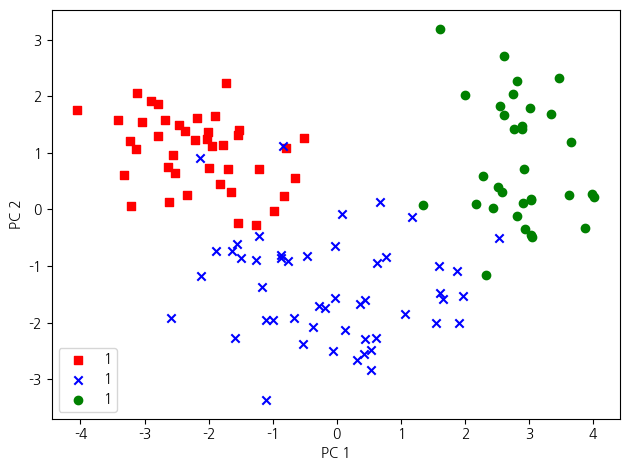

In [24]:
X_train_pca=X_train_std.dot(w)
# (124X13) X (13X2) 이니까 124X2가 된다 
colors=["r","b","g"]
markers=["s","x","o"]
# 컬러스에는 r b g를 넣고 마커에는 s x o를 넣고 
for l,c,m in zip(np.unique(y_train),colors,markers):
    plt.scatter(X_train_pca[y_train==l,0],X_train_pca[y_train==l,1],c=c,label=1,marker=m)
# y트레인 값에서 중복값을 제외한 것(1 2 3)이 되겠지 컬러스 마커스를 하나씩 zip함수를 써서 튜플형태로 만들고 차례로 l c m에 넣어가면서 for 문을 실행한다.
# 불린 인덱싱으로 y_train==1,2,3이 돌아가면서 들어가면서 받는 놈의 행 만 인덱싱 해서 0번 칼럼, 1번 칼럼 내용으로 색깔과 마커 를 돌려쓰면서 산점도를 그린다. 
plt.xlabel("PC 1") 
plt.ylabel("PC 2")
# 레이블로는 PC1과 PC2를 붙임
plt.legend(loc="lower left")
# 범례는 좌측 하단
plt.tight_layout()
# 여백 줄이기
plt.show()
# 플롯 그림

위의 그래프를 그려보면 X축 이 더 넓직 넓직하게 그려져 있다 사유는 분산값이 높은 놈 순으로 했으니 
x값이 더 넓직넓직(분산이 크다)
위 그래프에서 주의할점은 산점도를 그릴떄 행을 뽑기 해서 클래스 레이블(y값)을 사용하였는데 PCA는 레이블 값을 사용하지 않는 비지도 학습 기법이다. 

In [25]:
# 2장에서 만들었던 plot_decision_regions (결정 결계 시각화 함수) 함수를 정의하는 과정
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
# plot_decision_regions함수를 정의하고 파라미터는 X,y,classifier,resolution인데 resolution은 0.02로 고정함
    # 마커와 컬러맵을 준비합니다
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    # 마커스와 컬러스라는 변수에 각각 글자를 넣고 
    cmap = ListedColormap(colors[:len(np.unique(y))])
    # 컬러맵에서 y값에서 중복값을 제거하고 그 갯수만큼을 컬러스에서 슬라이싱해서 색깔을 슬라이싱해서 넣는다.
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    # x1의 민맥스 값에는 X의 0번칼럼의 민값-1 맥스 +1을 넣어준다 
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    # X2_min X2_max에도 X의 1번칼럼의 민값-1, X의 1번 칼럼의 맥스값 +1 을 넣어준다.
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    # xx1,xx2에 x1_min부터 x1_max를 해상도 차이 만치의 리스트를 만들고 x2에대해서 똑같이 리스트를 만들어서 
    # 좌표 매트릭스를 각각 xx1 xx2에 넣는다. 
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    # Z라는변수에는 함수정의시 입력으로 받았던 분류기의 predict 메서드를 쓴다 어디에다가? 
    # 위에서 정의한XX1 XX2를 일자로 쭉펴고
    Z = Z.reshape(xx1.shape)
    # Z를 xx1모양으로 재배열한다. 
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # 클래스별로 샘플을 그립니다
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.6, 
                    color=cmap(idx),
                    edgecolor=None if idx==1 else 'black',
                    marker=markers[idx], 
                    label=cl)

In [40]:
print(X_train_std.shape)
X_train_std.ravel().shape
np.array([X_train_std.ravel(),X_test_std.ravel()]).T.shape

(124, 13)


c:\ProgramData\Anaconda3\envs\mcl1\lib\site-packages\ipykernel_launcher.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  This is separate from the ipykernel package so we can avoid doing imports until


array([array([ 0.71225893,  2.22048673, -0.13025864, ...,  1.06806189,
               0.73691694, -0.89683324])                              ,
       array([ 8.94437367e-01, -3.88117877e-01,  1.10073064e+00, -8.12017114e-01,
               1.13201117e+00,  1.09807851e+00,  7.12041017e-01,  1.81013423e-01,
               6.62804643e-02,  5.12859235e-01,  7.96297849e-01,  4.48295020e-01,
               1.90593792e+00, -1.04879931e+00, -7.72993966e-01,  5.41190056e-01,
              -2.40938809e-01,  3.49414498e-01, -7.07219221e-01, -3.08121293e-01,
               6.76138376e-01, -1.03520519e+00, -9.06567274e-01,  2.24570604e+00,
              -5.61881713e-01, -1.22874035e+00,  1.64744158e+00, -4.13776283e-01,
               2.42768413e-01, -1.56343594e+00, -2.19746720e-01,  2.84881333e-01,
               4.47191186e-01, -5.61674005e-01,  5.74658458e-01,  6.79643589e-02,
               2.98063782e-01,  1.38631627e+00,  1.64471473e+00,  2.02159300e-01,
              -4.90751501e-01, -9.136

In [ ]:
from sklearn.linear_model import LogisticRegression

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

lr = LogisticRegression(random_state=1)
lr = lr.fit(X_train_pca, y_train)

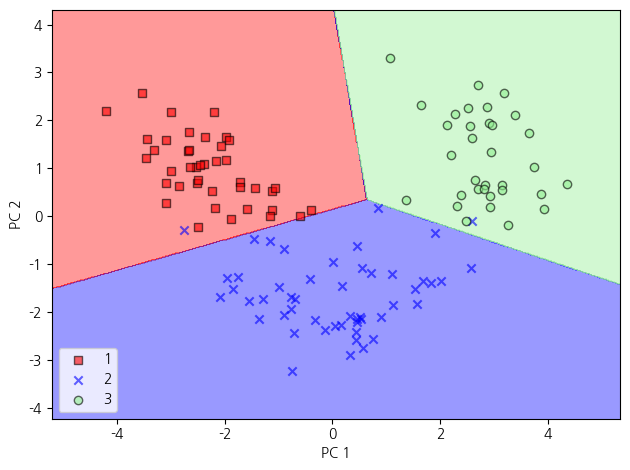

In [ ]:
plot_decision_regions(X_train_pca, y_train, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
# plt.savefig('images/05_04.png', dpi=300)
plt.show()

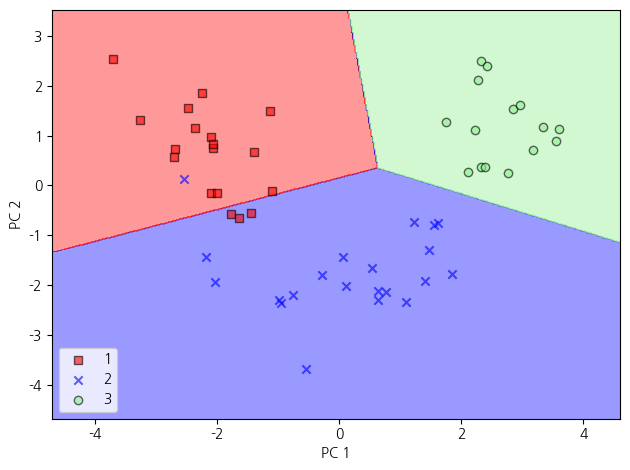

In [ ]:
plot_decision_regions(X_test_pca, y_test, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
# plt.savefig('images/05_05.png', dpi=300)
plt.show()

In [ ]:
pca = PCA(n_components=None)
X_train_pca = pca.fit_transform(X_train_std)
pca.explained_variance_ratio_

array([0.36951469, 0.18434927, 0.11815159, 0.07334252, 0.06422108,
       0.05051724, 0.03954654, 0.02643918, 0.02389319, 0.01629614,
       0.01380021, 0.01172226, 0.00820609])

In [ ]:
pca = PCA(n_components=0.95)
pca.fit(X_train_std)
print('주성분 개수:', pca.n_components_)
print('설명된 분산 비율:', np.sum(pca.explained_variance_ratio_))

주성분 개수: 10
설명된 분산 비율: 0.9662714406558742


In [ ]:
pca = PCA(n_components='mle')
pca.fit(X_train_std)
print('주성분 개수:', pca.n_components_)
print('설명된 분산 비율:', np.sum(pca.explained_variance_ratio_))

주성분 개수: 9
설명된 분산 비율: 0.9499753029186232


In [ ]:
from sklearn.decomposition import IncrementalPCA

ipca = IncrementalPCA(n_components=9)
for batch in range(len(X_train_std)//25+1):
    X_batch = X_train_std[batch*25:(batch+1)*25]
    ipca.partial_fit(X_batch)

print('주성분 개수:', ipca.n_components_)
print('설명된 분산 비율:', np.sum(ipca.explained_variance_ratio_))

주성분 개수: 9
설명된 분산 비율: 0.9478392700446654
